## Executive Summary

In this notebook I explore the Starbucks Nutrition Dataset to answer several business questions. Then, I provide two ways of storytelling: one for executive members and one for the technical audiences. This is part of Springboard Data Science Bootcamp. I use cleaned (minor cleaning) dataset, and then I explore the dataset by visualizing the data.

In [2]:
# Importing packages
import pandas as pd
import numpy as np

# Packages for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Imports imputer for missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler

## 1. Loading the data

In [4]:
pwd = r"C:\Users\wds_saeed.rafieepour\OneDrive - WSP O365\Desktop\Wood Desktop\Training\Springboard DS Course\20. Data Storytelling\20.3\archive"

In [10]:
sb_full_menu = pd.read_csv(pwd + "\\starbucks_drinkMenu_expanded.csv")
sb_drink_menu = pd.read_csv(pwd + "\\starbucks-menu-nutrition-drinks.csv")
sb_food_menu = pd.read_csv(pwd + "\\starbucks-menu-nutrition-food.csv", encoding='utf-16')

In [15]:
sb_full_menu.Beverage_category.unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [13]:
sb_drink_menu.head()

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
1,Ombré Pink Drink,-,-,-,-,-,-
2,Pink Drink,-,-,-,-,-,-
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10


In [14]:
sb_food_menu.head()

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g)
0,Chonga Bagel,300,5.0,50,3,12
1,8-Grain Roll,380,6.0,70,7,10
2,Almond Croissant,410,22.0,45,3,10
3,Apple Fritter,460,23.0,56,2,7
4,Banana Nut Bread,420,22.0,52,2,6


## 2. Cleaning

2.1 Full Menu Cleaning

In [55]:
sb_full_menu.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

As some of the column names include spaces in them, We rename some of the columns to have consistent naming with no extra spaces of useful characters

In [56]:
sb_full_menu = sb_full_menu.rename(columns={' Total Fat (g)': 'Total Fat', 'Trans Fat (g) ': 'Trans Fat',
                                            'Saturated Fat (g)': 'Saturated Fat', ' Sodium (mg)': 'Sodium',
                                            ' Total Carbohydrates (g) ': 'Total Carbohydrates',
                                            'Cholesterol (mg)': 'Cholesterol', ' Dietary Fibre (g)': 'Dietary Fibre',
                                            ' Sugars (g)': 'Sugars', ' Protein (g) ': 'Protein',
                                            'Vitamin A (% DV) ': 'Vitamin A (% DV)', ' Calcium (% DV) ': 'Calcium (% DV)',
                                            'Iron (% DV) ': 'Iron (% DV)', 'Caffeine (mg)': 'Caffeine'})

In [57]:
sb_full_menu.describe()

,Calories,Trans Fat,Saturated Fat,Sodium,Total Carbohydrates,Cholesterol,Dietary Fibre,Sugars,Protein
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,193.871901,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512
std,102.863303,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000
50%,185.000000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000
75%,260.000000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000
max,510.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000


In [58]:
sb_full_menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Beverage_category    242 non-null    object 
 1   Beverage             242 non-null    object 
 2   Beverage_prep        242 non-null    object 
 3   Calories             242 non-null    int64  
 4   Total Fat            242 non-null    object 
 5   Trans Fat            242 non-null    float64
 6   Saturated Fat        242 non-null    float64
 7   Sodium               242 non-null    int64  
 8   Total Carbohydrates  242 non-null    int64  
 9   Cholesterol          242 non-null    int64  
 10  Dietary Fibre        242 non-null    int64  
 11  Sugars               242 non-null    int64  
 12  Protein              242 non-null    float64
 13  Vitamin A (% DV)     242 non-null    object 
 14  Vitamin C (% DV)     242 non-null    object 
 15  Calcium (% DV)       242 non-null    obj

It seems that the only column containing the null values is Caffeine. Let's explore!

In [59]:
sb_full_menu.dtypes

Beverage_category       object
Beverage                object
Beverage_prep           object
Calories                 int64
Total Fat               object
Trans Fat              float64
Saturated Fat          float64
Sodium                   int64
Total Carbohydrates      int64
Cholesterol              int64
Dietary Fibre            int64
Sugars                   int64
Protein                float64
Vitamin A (% DV)        object
Vitamin C (% DV)        object
Calcium (% DV)          object
Iron (% DV)             object
Caffeine                object
dtype: object

Some of the columns shall be numeric, but are of object type, so we identify those and try to fix them.

In [60]:
sb_full_menu_num_butclass_obj = sb_full_menu.select_dtypes(include=['object']).iloc[:,3:]

In [62]:
sb_full_menu_num_butclass_obj.columns

Index(['Total Fat', 'Vitamin A (% DV)', 'Vitamin C (% DV)', 'Calcium (% DV)',
       'Iron (% DV)', 'Caffeine'],
      dtype='object')

In [110]:
for col in sb_full_menu_num_butclass_obj.columns:
    print(f"{col} Column Unique Values:","\n", sb_full_menu_num_butclass_obj[col].unique(), "\n")

Total Fat Column Unique Values: 
 ['0.1' '3.5' '2.5' '0.2' '6' '4.5' '0.3' '7' '5' '0.4' '9' '1.5' '4' '2'
 '8' '3' '11' '0' '1' '10' '15' '13' '0.5' '3 2'] 

Vitamin A (% DV) Column Unique Values: 
 ['0%' '10%' '6%' '15%' '20%' '30%' '25%' '8%' '4%' '2%' '50%'] 

Vitamin C (% DV) Column Unique Values: 
 ['0%' '2%' '4%' '6%' '10%' '15%' '20%' '80%' '100%' '8%'] 

Calcium (% DV) Column Unique Values: 
 ['0%' '2%' '20%' '30%' '40%' '50%' '15%' '25%' '35%' '45%' '10%' '60%'
 '6%' '8%'] 

Iron (% DV) Column Unique Values: 
 ['0%' '8%' '15%' '25%' '10%' '20%' '30%' '40%' '50%' '6%' '2%' '4%'
 '0.00%' '6.00%' '8.00%' '10.00%' '15.00%' '35%'] 

Caffeine Column Unique Values: 
 ['175' '260' '330' '410' '75' '150' '85' '95' '180' '225' '300' '10' '20'
 '25' '30' '0' 'Varies' '50' '70' '120' '55' '80' '110' 'varies' '165'
 '235' '90' nan '125' '170' '15' '130' '140' '100' '145' '65' '105'] 



We now replace all percent signs

In [114]:
cols_percent_indx = [i for i in range(len(sb_full_menu_num_butclass_obj.columns)) if "% DV" in 
                sb_full_menu_num_butclass_obj.columns[i]]
cols_percent = [sb_full_menu_num_butclass_obj.columns[col] for col in cols_percent_indx]
for col in cols_percent:
    sb_full_menu_num_butclass_obj[col] = "0." + sb_full_menu_num_butclass_obj[col]
    sb_full_menu_num_butclass_obj[col] = sb_full_menu_num_butclass_obj[col].str.replace('%','')

Converting object data types to numeric

As there is an issue with the index 237, that is "3 2" we try to fix this

In [125]:
sb_full_menu_num_butclass_obj.iloc[237]

Total Fat            3.2
Vitamin A (% DV)     0.6
Vitamin C (% DV)     0.8
Calcium (% DV)      0.20
Iron (% DV)         0.10
Caffeine               0
Name: 237, dtype: object

In [122]:
sb_full_menu_num_butclass_obj.loc[237, 'Total Fat'] = '3.2'

There is another issue with column Iron (% DV)

In [124]:
sb_full_menu_num_butclass_obj.iloc[130]

Total Fat              0.1
Vitamin A (% DV)       0.6
Vitamin C (% DV)       0.0
Calcium (% DV)        0.10
Iron (% DV)         0.0.00
Caffeine            varies
Name: 130, dtype: object

In [ ]:
# removing 0.00 from Iron (%DV)
sb_full_menu_num_butclass_obj.replace({"Iron (% DV)":{'.00': ''}}, regex=True, inplace=True)

Same for "Varies" in column Caffeine

In [129]:
sb_full_menu_num_butclass_obj.iloc[102]

Total Fat                0
Vitamin A (% DV)       0.0
Vitamin C (% DV)       0.0
Calcium (% DV)         0.0
Iron (% DV)            0.0
Caffeine            Varies
Name: 102, dtype: object

In [135]:
sb_full_menu_num_butclass_obj.replace({"Caffeine":{'Varies': None, 'varies': None}}, regex=True, inplace=True)

In [136]:
sb_full_menu_num_butclass_obj = sb_full_menu_num_butclass_obj.apply(pd.to_numeric)

In [137]:
sb_full_menu_num_butclass_obj.dtypes

Total Fat           float64
Vitamin A (% DV)    float64
Vitamin C (% DV)    float64
Calcium (% DV)      float64
Iron (% DV)         float64
Caffeine            float64
dtype: object

In [147]:
sb_full_menu = pd.concat([sb_full_menu.drop(columns = sb_full_menu_num_butclass_obj.columns, axis=1), sb_full_menu_num_butclass_obj], axis=1)

In [148]:
sb_full_menu.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Trans Fat,Saturated Fat,Sodium,Total Carbohydrates,Cholesterol,Dietary Fibre,Sugars,Protein,Total Fat,Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine
0,Coffee,Brewed Coffee,Short,3,0.0,0.0,0,5,0,0,0,0.3,0.1,0.0,0.0,0.0,0.0,175.0
1,Coffee,Brewed Coffee,Tall,4,0.0,0.0,0,10,0,0,0,0.5,0.1,0.0,0.0,0.0,0.0,260.0
2,Coffee,Brewed Coffee,Grande,5,0.0,0.0,0,10,0,0,0,1.0,0.1,0.0,0.0,0.0,0.0,330.0
3,Coffee,Brewed Coffee,Venti,5,0.0,0.0,0,10,0,0,0,1.0,0.1,0.0,0.0,0.2,0.0,410.0
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.0,5,75,10,0,9,6.0,0.1,0.1,0.0,0.2,0.0,75.0


In [161]:
for col in sb_full_menu.select_dtypes(include='object').columns:
    print(sb_full_menu[col].unique(), "\n")

['Coffee' 'Classic Espresso Drinks' 'Signature Espresso Drinks'
 'Tazo® Tea Drinks' 'Shaken Iced Beverages' 'Smoothies'
 'Frappuccino® Blended Coffee' 'Frappuccino® Light Blended Coffee'
 'Frappuccino® Blended Crème'] 

['Brewed Coffee' 'Caffè Latte' 'Caffè Mocha (Without Whipped Cream)'
 'Vanilla Latte (Or Other Flavoured Latte)' 'Caffè Americano' 'Cappuccino'
 'Espresso' 'Skinny Latte (Any Flavour)' 'Caramel Macchiato'
 'White Chocolate Mocha (Without Whipped Cream)'
 'Hot Chocolate (Without Whipped Cream)'
 'Caramel Apple Spice (Without Whipped Cream)' 'Tazo® Tea'
 'Tazo® Chai Tea Latte' 'Tazo® Green Tea Latte'
 'Tazo® Full-Leaf Tea Latte'
 'Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)'
 'Iced Brewed Coffee (With Classic Syrup)'
 'Iced Brewed Coffee (With Milk & Classic Syrup)'
 'Shaken Iced Tazo® Tea (With Classic Syrup)'
 'Shaken Iced Tazo® Tea Lemonade (With Classic Syrup)'
 'Banana Chocolate Smoothie' 'Orange Mango Banana Smoothie'
 'Strawberry Banana Smoothie' 'Coffee' 'Moch

In [156]:
sb_full_menu.isna().any()

Beverage_category      False
Beverage               False
Beverage_prep          False
Calories               False
Trans Fat              False
Saturated Fat          False
Sodium                 False
Total Carbohydrates    False
Cholesterol            False
Dietary Fibre          False
Sugars                 False
Protein                False
Total Fat              False
Vitamin A (% DV)       False
Vitamin C (% DV)       False
Calcium (% DV)         False
Iron (% DV)            False
Caffeine                True
dtype: bool

In [151]:
sb_full_menu[sb_full_menu["Caffeine"].isna()]

,Beverage_category,Beverage,Beverage_prep,Calories,Trans Fat,Saturated Fat,Sodium,Total Carbohydrates,Cholesterol,Dietary Fibre,Sugars,Protein,Total Fat,Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine
102,Tazo® Tea Drinks,Tazo® Tea,Short,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.00,0.00,0.00,0.00,NaN
103,Tazo® Tea Drinks,Tazo® Tea,Tall,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.00,0.00,0.00,0.00,NaN
104,Tazo® Tea Drinks,Tazo® Tea,Grande,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.00,0.00,0.00,0.00,NaN
105,Tazo® Tea Drinks,Tazo® Tea,Venti,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.00,0.00,0.00,0.00,NaN
130,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Short Nonfat Milk,80,0.1,0.0,0,45,16,0,16,4.0,0.1,0.60,0.00,0.10,0.00,NaN
131,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,2% Milk,90,1.0,0.1,10,50,15,0,15,3.0,2.0,0.60,0.00,0.10,0.00,NaN
132,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Soymilk,80,0.2,0.0,0,40,14,0,13,3.0,1.5,0.40,0.00,0.10,0.60,NaN
133,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Tall Nonfat Milk,120,0.1,0.0,5,65,23,0,23,5.0,0.1,0.10,0.00,0.20,0.00,NaN
134,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,2% Milk,140,1.5,0.1,15,75,23,0,23,5.0,3.0,0.80,0.00,0.15,0.00,NaN
135,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Soymilk,130,0.3,0.0,0,60,21,1,19,4.0,2.5,0.60,0.00,0.20,0.80,NaN


We impute the coffeine level using the mean value

In [171]:
#sb_full_menu["Caffeine (mg)"].iloc[158] = sb_full_menu["Caffeine (mg)"].mean()

In [169]:
# Iterative Imputation
iter_imputer = IterativeImputer(missing_values=np.nan, max_iter=10, verbose=0, imputation_order='roman', random_state=24)
sb_full_menu_caffeine = sb_full_menu[["Caffeine"]].to_numpy()
sb_full_menu_caffeine = pd.DataFrame(iter_imputer.fit_transform(sb_full_menu_caffeine.reshape(-1, 1)))
sb_full_menu["Caffeine"] = sb_full_menu_caffeine

In [172]:
sb_full_menu.isnull().any()

Beverage_category      False
Beverage               False
Beverage_prep          False
Calories               False
Trans Fat              False
Saturated Fat          False
Sodium                 False
Total Carbohydrates    False
Cholesterol            False
Dietary Fibre          False
Sugars                 False
Protein                False
Total Fat              False
Vitamin A (% DV)       False
Vitamin C (% DV)       False
Calcium (% DV)         False
Iron (% DV)            False
Caffeine               False
dtype: bool

#### Starbucks Drinks menu

In [270]:
sb_drink_menu.head()

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
1,Ombré Pink Drink,-,-,-,-,-,-
2,Pink Drink,-,-,-,-,-,-
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10


In [281]:
sb_drink_menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Drinks     177 non-null    object 
 1   Calories   92 non-null     float64
 2   Fat (g)    92 non-null     float64
 3   Carb. (g)  92 non-null     float64
 4   Fiber (g)  92 non-null     float64
 5   Protein    92 non-null     float64
 6   Sodium     92 non-null     float64
dtypes: float64(6), object(1)
memory usage: 9.8+ KB


Changing the first column name

In [271]:
sb_drink_menu.rename(columns={'Unnamed: 0' : 'Drinks'}, inplace=True)

In [272]:
sb_drink_menu.isnull().any()

Drinks       False
Calories     False
Fat (g)      False
Carb. (g)    False
Fiber (g)    False
Protein      False
Sodium       False
dtype: bool

In [273]:
sb_drink_menu.dtypes

Drinks       object
Calories     object
Fat (g)      object
Carb. (g)    object
Fiber (g)    object
Protein      object
Sodium       object
dtype: object

In [274]:
for i in sb_drink_menu.columns[1:]:
    print(sb_drink_menu[i].unique(), "\n")

['45' '-' '80' '60' '110' '0' '130' '140' '150' '70' '120' '30' '90' '210'
 '200' '50' '10' '5' '320' '430' '190' '290' '250' '260' '180' '230' '300'
 '360' '350' '280'] 

['0' '-' '2.5' '5' '6' '9' '26' '7' '8' '4' '4.5' '1' '11' '0.5' '2'] 

['11' '-' '18' '14' '28' '0' '21' '23' '19' '15' '38' '35' '37' '17' '31'
 '8' '24' '27' '33' '34' '13' '2' '5' '47' '45' '42' '12' '40' '32' '36'
 '30' '53' '64' '60'] 

['0' '-' '1' '2' '4' '5' '8' '7'] 

['0' '-' '5' '20' '1' '14' '12' '13' '8' '10' '11' '9' '7' '3' '15' '4'
 '16'] 

['10' '-' '5' '0' '65' '90' '15' '115' '120' '20' '25' '160' '170' '140'
 '100' '150' '180' '95' '190' '40' '240' '200' '220' '135' '130'] 



Issue of '-' in second row of all numeric columns

In [275]:
sb_drink_menu.replace({"Calories":{'-': None}, "Fat (g)":{'-': None},"Carb. (g)":{'-': None}, "Fiber (g)":{'-': None}, 
                       "Protein":{'-': None},"Sodium":{'-': None}}, regex=True, inplace=True)

In [276]:
sb_drink_menu = pd.concat([sb_drink_menu.drop(columns=sb_drink_menu.iloc[:,1:]), sb_drink_menu.iloc[:,1:].apply(pd.to_numeric)], axis=1)

In [277]:
sb_drink_menu.dtypes

Drinks        object
Calories     float64
Fat (g)      float64
Carb. (g)    float64
Fiber (g)    float64
Protein      float64
Sodium       float64
dtype: object

In [278]:
sb_drink_menu.isnull().any()

Drinks       False
Calories      True
Fat (g)       True
Carb. (g)     True
Fiber (g)     True
Protein       True
Sodium        True
dtype: bool

In [286]:
# drop the rows with null values
sb_drink_menu[sb_drink_menu.isna().any(axis=1)]

,Drinks,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
1,Ombré Pink Drink,NaN,NaN,NaN,NaN,NaN,NaN
2,Pink Drink,NaN,NaN,NaN,NaN,NaN,NaN
5,Violet Drink,NaN,NaN,NaN,NaN,NaN,NaN
6,Evolution Fresh™ Cold-Pressed Apple Berry Juice,NaN,NaN,NaN,NaN,NaN,NaN
7,Evolution Fresh™ Defense Up,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
169,Organic Chocolate Milk Box,NaN,NaN,NaN,NaN,NaN,NaN
170,Steamed Apple Juice,NaN,NaN,NaN,NaN,NaN,NaN
174,Ginger Ale,NaN,NaN,NaN,NaN,NaN,NaN
175,Lemon Ale,NaN,NaN,NaN,NaN,NaN,NaN


In [287]:
sb_drink_menu.dropna(inplace=True)

In [300]:
sb_drink_menu = sb_drink_menu[~sb_drink_menu.duplicated(subset=['Drinks'],keep=False)]

In [302]:
sb_drink_menu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 173
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Drinks     56 non-null     object 
 1   Calories   56 non-null     float64
 2   Fat (g)    56 non-null     float64
 3   Carb. (g)  56 non-null     float64
 4   Fiber (g)  56 non-null     float64
 5   Protein    56 non-null     float64
 6   Sodium     56 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.5+ KB


#### Starbucks Food menu

In [198]:
sb_food_menu.head()

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g)
0,Chonga Bagel,300,5.0,50,3,12
1,8-Grain Roll,380,6.0,70,7,10
2,Almond Croissant,410,22.0,45,3,10
3,Apple Fritter,460,23.0,56,2,7
4,Banana Nut Bread,420,22.0,52,2,6


In [199]:
sb_food_menu.rename(columns={'Unnamed: 0' : 'Food'}, inplace=True)

In [200]:
sb_food_menu.dtypes

Food             object
 Calories         int64
 Fat (g)        float64
 Carb. (g)        int64
 Fiber (g)        int64
 Protein (g)      int64
dtype: object

In [201]:
sb_food_menu.isnull().any()

Food            False
 Calories       False
 Fat (g)        False
 Carb. (g)      False
 Fiber (g)      False
 Protein (g)    False
dtype: bool

In [203]:
sb_food_menu.iloc[:,1:].apply(pd.to_numeric)

,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g)
0,300,5.0,50,3,12
1,380,6.0,70,7,10
2,410,22.0,45,3,10
3,460,23.0,56,2,7
4,420,22.0,52,2,6
...,...,...,...,...,...
108,180,14.0,12,3,4
109,190,18.0,6,3,7
110,340,13.0,38,0,18
111,90,8.0,5,4,1


## 3. Exploratory Data Analysis 

In [215]:
sb_full_menu.head(20)

,Beverage_category,Beverage,Beverage_prep,Calories,Trans Fat,Saturated Fat,Sodium,Total Carbohydrates,Cholesterol,Dietary Fibre,Sugars,Protein,Total Fat,Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine
0,Coffee,Brewed Coffee,Short,3,0.0,0.0,0,5,0,0,0,0.3,0.1,0.00,0.0,0.00,0.00,175.0
1,Coffee,Brewed Coffee,Tall,4,0.0,0.0,0,10,0,0,0,0.5,0.1,0.00,0.0,0.00,0.00,260.0
2,Coffee,Brewed Coffee,Grande,5,0.0,0.0,0,10,0,0,0,1.0,0.1,0.00,0.0,0.00,0.00,330.0
3,Coffee,Brewed Coffee,Venti,5,0.0,0.0,0,10,0,0,0,1.0,0.1,0.00,0.0,0.20,0.00,410.0
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.0,5,75,10,0,9,6.0,0.1,0.10,0.0,0.20,0.00,75.0
5,Classic Espresso Drinks,Caffè Latte,2% Milk,100,2.0,0.1,15,85,10,0,9,6.0,3.5,0.10,0.0,0.20,0.00,75.0
6,Classic Espresso Drinks,Caffè Latte,Soymilk,70,0.4,0.0,0,65,6,1,4,5.0,2.5,0.60,0.0,0.20,0.80,75.0
7,Classic Espresso Drinks,Caffè Latte,Tall Nonfat Milk,100,0.2,0.0,5,120,15,0,14,10.0,0.2,0.15,0.0,0.30,0.00,75.0
8,Classic Espresso Drinks,Caffè Latte,2% Milk,150,3.0,0.2,25,135,15,0,14,10.0,6.0,0.15,0.0,0.30,0.00,75.0
9,Classic Espresso Drinks,Caffè Latte,Soymilk,110,0.5,0.0,0,105,10,1,6,8.0,4.5,0.10,0.0,0.30,0.15,75.0


### Q.1: How much calories does each beverage provide?
We can plot each beverage as a bar chart/count/cat plot

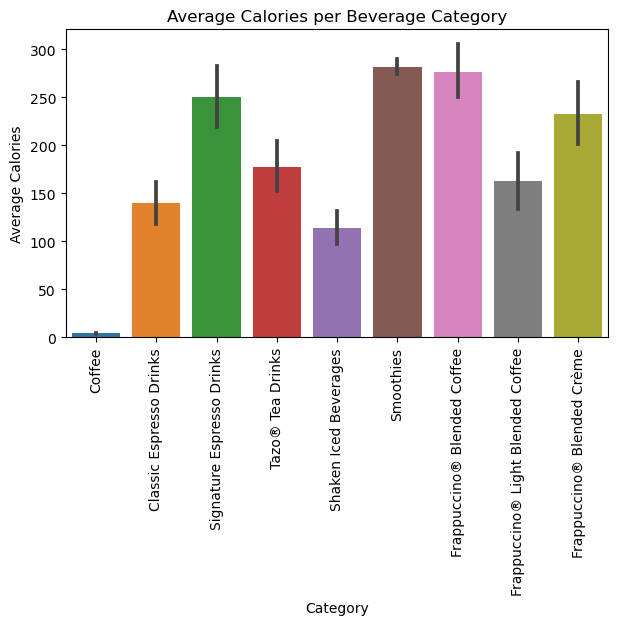

In [206]:
plt.figure(figsize=(7,4))
plot = sns.barplot(y=sb_full_menu['Calories'], x=sb_full_menu['Beverage_category']).set(xlabel='Category', 
                                            ylabel='Average Calories', title='Average Calories per Beverage Category')
plt.xticks(rotation=90)
plt.show()

### Q.2: Subdivide each beverage by the provided type

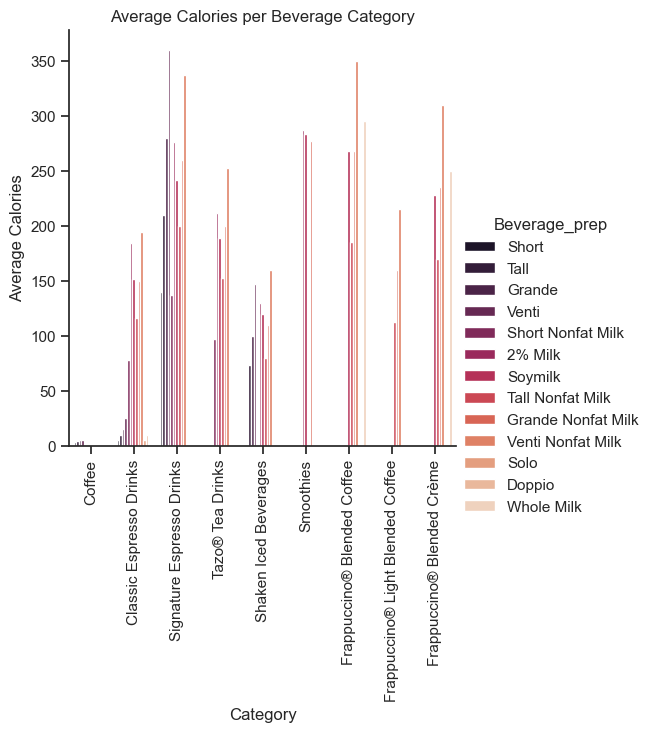

In [213]:
sns.set_theme(style="ticks") 
plot = sns.catplot(data=sb_full_menu, kind="bar", x="Beverage_category", y="Calories", 
                   hue="Beverage_prep", errorbar=None, palette="rocket")
plot.set(xlabel='Category', ylabel='Average Calories', title='Average Calories per Beverage Category')
plt.xticks(rotation=90)
plt.show()

### Q.3: How many preparation types as per the beverage category?

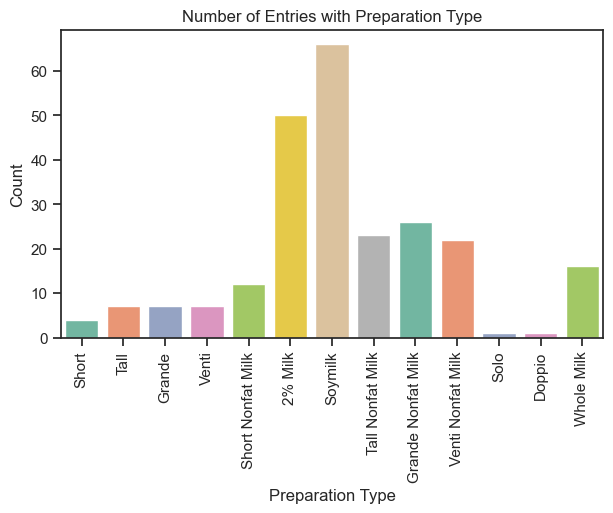

In [214]:
plt.figure(figsize=(7,4))
plot = sns.countplot(data=sb_full_menu, x='Beverage_prep', palette="Set2") # Notice the use of the 'palette' attribute here
plot.set(xlabel='Preparation Type', ylabel='Count', title='Number of Entries with Preparation Type')
plt.xticks(rotation=90)
plt.show()

### Q.4: How the calories and fats of each beverage are correlated?

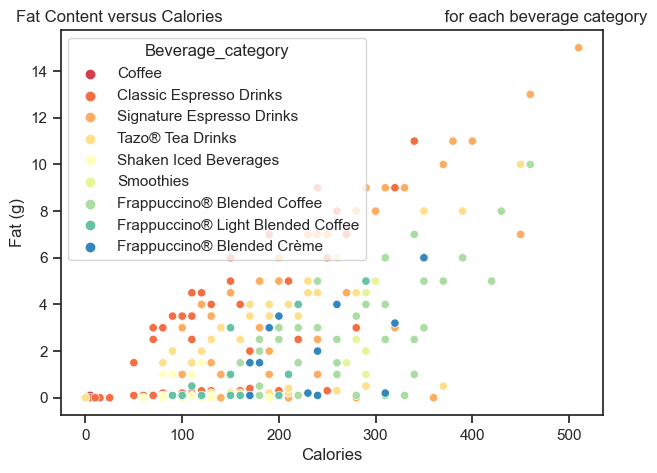

In [232]:
plt.figure(figsize=(7,5))
plot = sns.scatterplot(data=sb_full_menu, x = 'Calories', y = 'Total Fat', hue = 'Beverage_category', 
                       palette='Spectral').set(xlabel='Calories', ylabel='Fat (g)', title='Fat Content versus Calories \
                                               for each beverage category')
plt.show()

### Q.5: How the calories and fats of each food are correlated and its relationship with amount of carbohydrate?

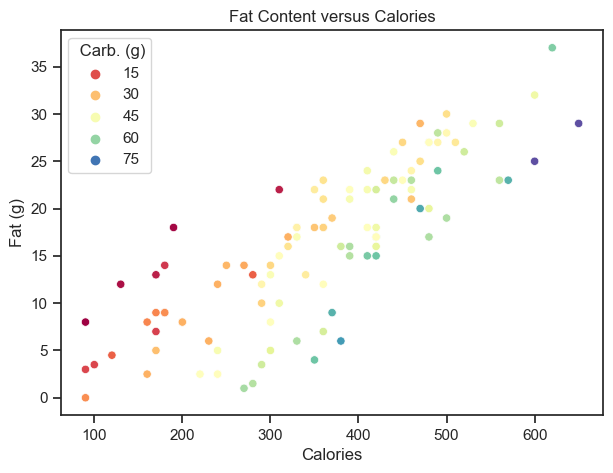

In [227]:
plt.figure(figsize=(7,5))
plot = sns.scatterplot(data=sb_food_menu, x = ' Calories', y = ' Fat (g)', hue = ' Carb. (g)', 
                       palette='Spectral').set(xlabel='Calories', ylabel='Fat (g)', title='Fat Content versus Calories')
plt.show()

<Figure size 500x500 with 0 Axes>

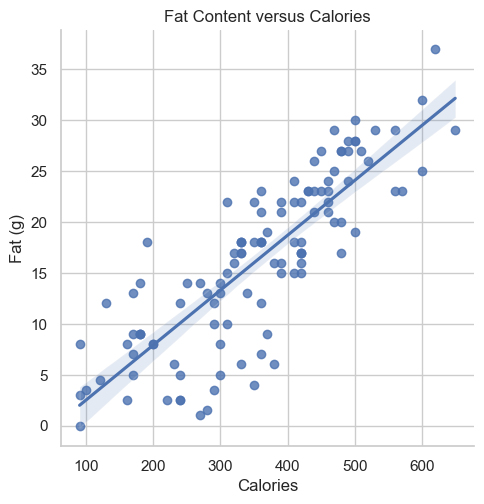

In [229]:
# here is the same plot with linear regression
plt.figure(figsize=(5, 5))
sns.set_theme(style='whitegrid')
sns.lmplot(data=sb_food_menu, x=' Calories', y=' Fat (g)').set(xlabel='Calories', ylabel='Fat (g)', 
                                                               title='Fat Content versus Calories')
plt.show()

### Q.6: How is the distribution of calories for the beverages?

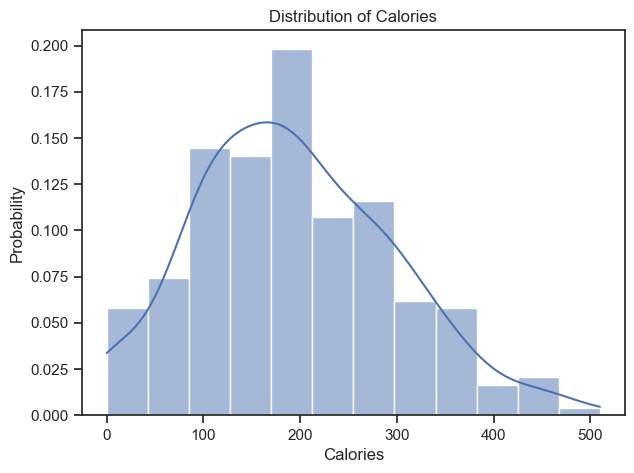

In [230]:
plt.figure(figsize=(7,5))
sns.set_theme(style='ticks')
sns.histplot(data=sb_full_menu, x='Calories', kde=True, stat='probability').set(title="Distribution of Calories")
plt.show()

### Q.7: How is the correlation between variables?

We use the heatmap plots

C:\Users\wds_saeed.rafieepour\AppData\Local\Temp\ipykernel_25756\2053677849.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(sb_full_menu.corr(), dtype=bool)) # Used to make a triangular plot
C:\Users\wds_saeed.rafieepour\AppData\Local\Temp\ipykernel_25756\2053677849.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrplot = sns.heatmap(sb_full_menu.corr(), vmin=-1, vmax=1, annot=True, mask=mask,


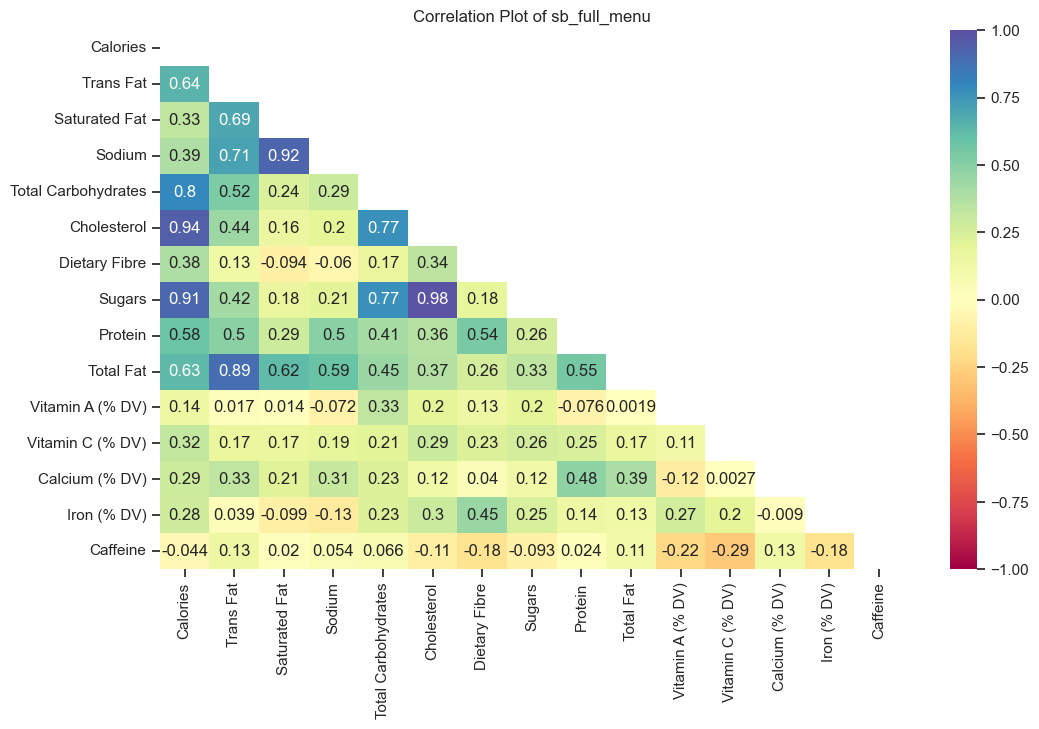

In [240]:
plt.figure(figsize=(12, 7))
mask = np.triu(np.ones_like(sb_full_menu.corr(), dtype=bool)) # Used to make a triangular plot
corrplot = sns.heatmap(sb_full_menu.corr(), vmin=-1, vmax=1, annot=True, mask=mask, 
                       cmap='Spectral').set_title("Correlation Plot of sb_full_menu") 
plt.show()

From the above table, it seems that the level of caffeine in the beverage has week correlations with most of the other variables, except a negative correlation with the Vitamin C. 

The calories has a positive correlation with cholestrole, sugar, total carbohydrates, and total fat, but weakly correlated to the vitamines and Iron as well as the caffeine level.

### Q.8: How is the relationship between variables of drinks?

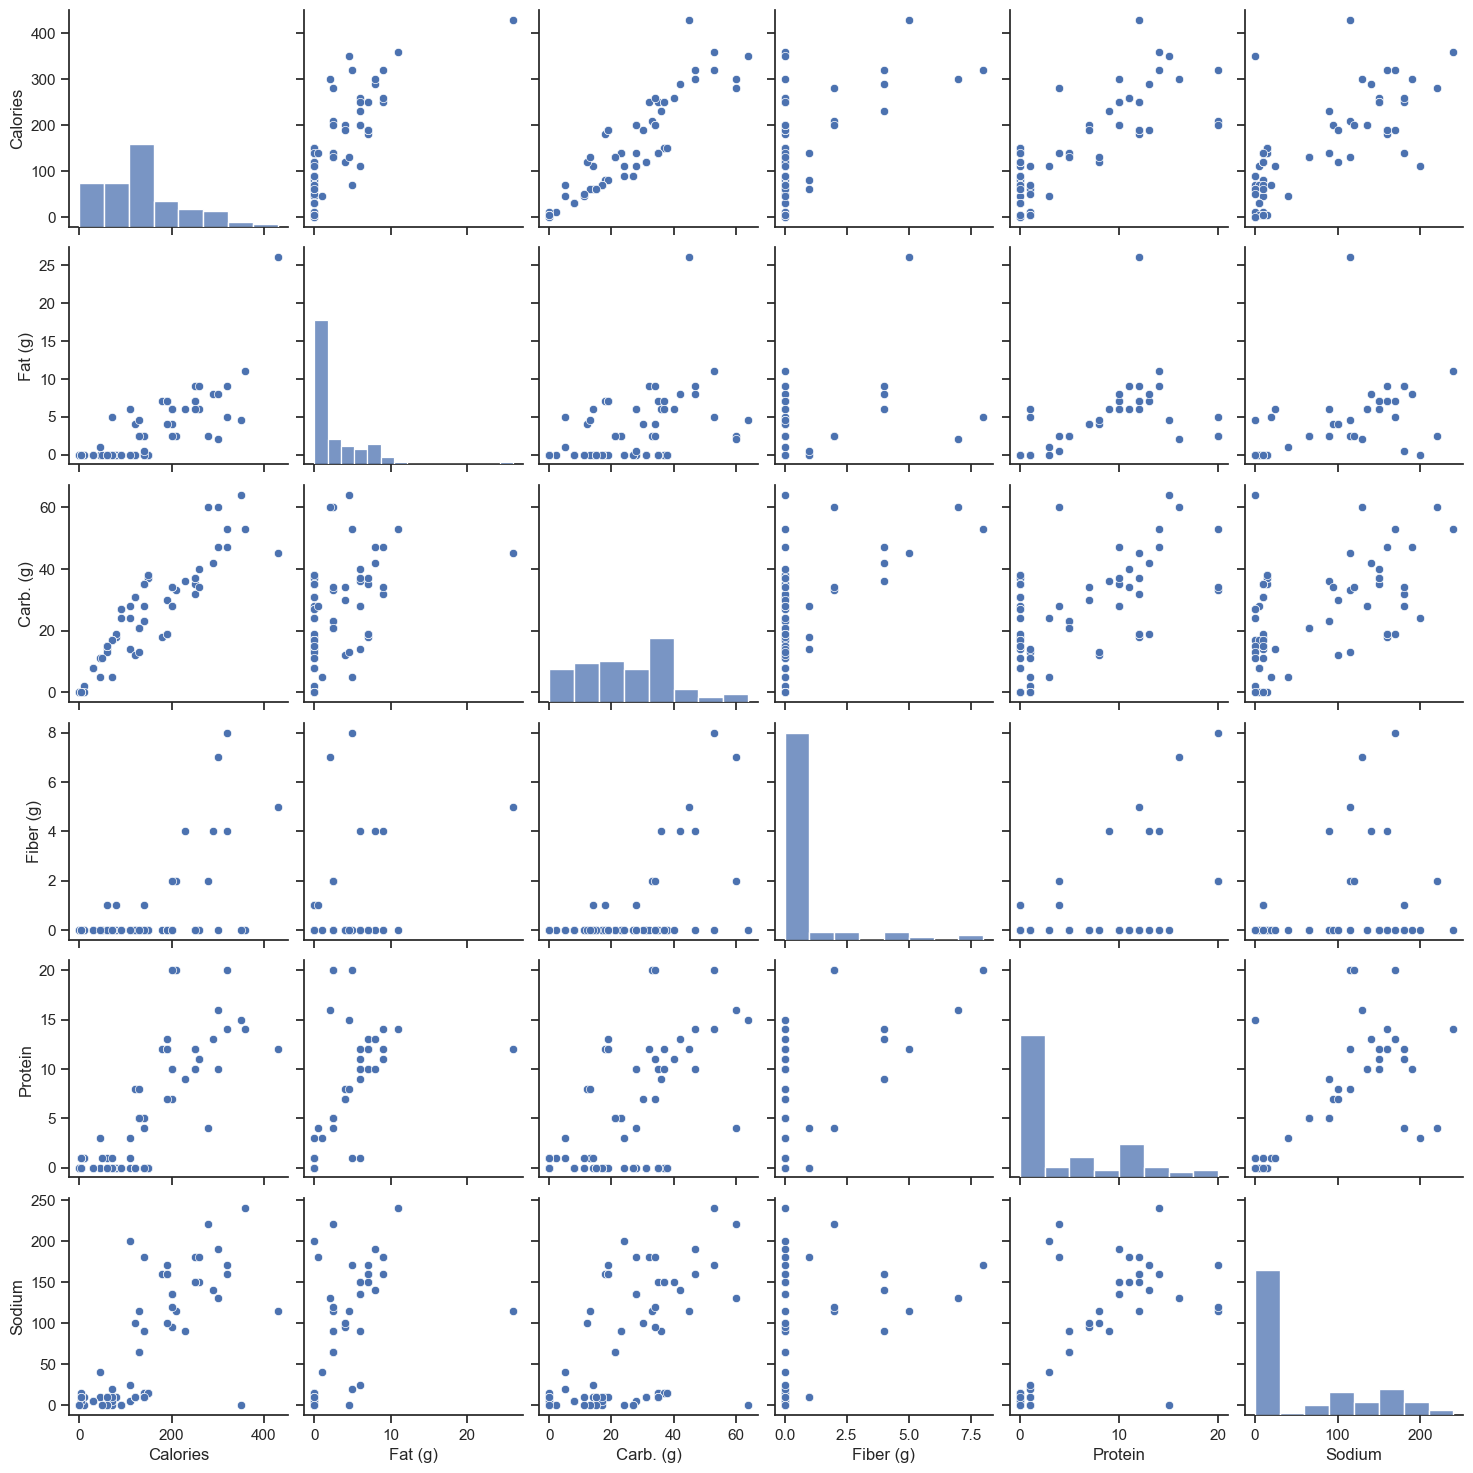

In [241]:
sns.set_theme(style='ticks')
sns.pairplot(data=sb_drink_menu)
plt.show()

### Q.9: How is the distribution of caffeine for each beverage category?

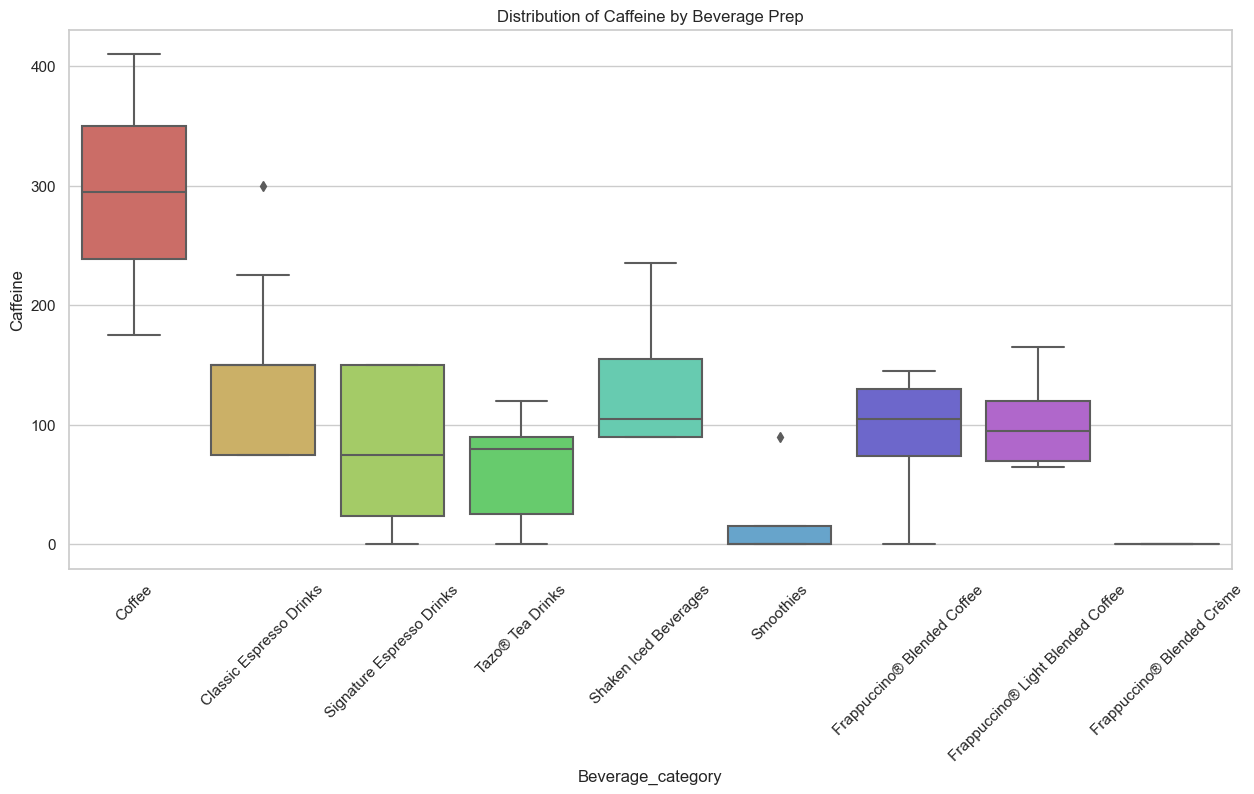

In [242]:
plt.figure(figsize=(15,7))
sns.set_theme(style='whitegrid')
sns.boxplot(data=sb_full_menu, x='Beverage_category', y='Caffeine', 
                                palette='hls').set(title='Distribution of Caffeine by Beverage Prep')
plt.xticks(rotation=45)
plt.show()

The level of caffeine in coffee beverages is much higher than other beverages. Smoothies and Frappuccino blended creams have the lowest level of caffeine. 

In [228]:
sb_full_menu

,Beverage_category,Beverage,Beverage_prep,Calories,Trans Fat,Saturated Fat,Sodium,Total Carbohydrates,Cholesterol,Dietary Fibre,Sugars,Protein,Total Fat,Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine
0,Coffee,Brewed Coffee,Short,3,0.0,0.0,0,5,0,0,0,0.3,0.1,0.0,0.0,0.00,0.0,175.0
1,Coffee,Brewed Coffee,Tall,4,0.0,0.0,0,10,0,0,0,0.5,0.1,0.0,0.0,0.00,0.0,260.0
2,Coffee,Brewed Coffee,Grande,5,0.0,0.0,0,10,0,0,0,1.0,0.1,0.0,0.0,0.00,0.0,330.0
3,Coffee,Brewed Coffee,Venti,5,0.0,0.0,0,10,0,0,0,1.0,0.1,0.0,0.0,0.20,0.0,410.0
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.0,5,75,10,0,9,6.0,0.1,0.1,0.0,0.20,0.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,0.4,0.0,0,250,67,1,64,5.0,3.2,0.6,0.8,0.20,0.1,0.0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.0,0,160,39,0,38,4.0,0.1,0.6,0.0,0.10,0.0,0.0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,2.0,0.1,10,160,39,0,38,3.0,3.5,0.6,0.0,0.10,0.0,0.0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,0.2,0.0,0,160,37,1,35,3.0,1.5,0.4,0.0,0.10,0.6,0.0


### Q.10: How much percentage of the data have less than 150 calories?
We use ECDF (Empirical Cumulative Distribution Function) Plot

[Text(0.5, 1.0, 'ECDF of Calories')]

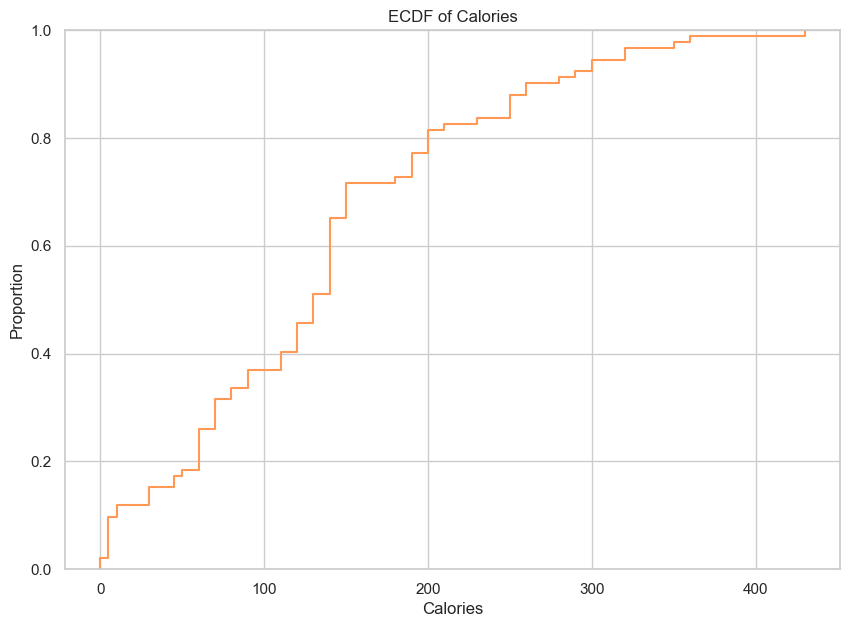

In [243]:
plt.figure(figsize=(10,7))
sns.set_theme(style='whitegrid')
sns.ecdfplot(data=sb_drink_menu, x='Calories', color='#ff9955').set(title='ECDF of Calories')

it seems that almost 50% of the beverages have less than 150 cal.

### Q.11: What food has the most amount of calories?

In [252]:
top20_cal = sb_food_menu.sort_values(by=[' Calories'], ascending=False).head(20)

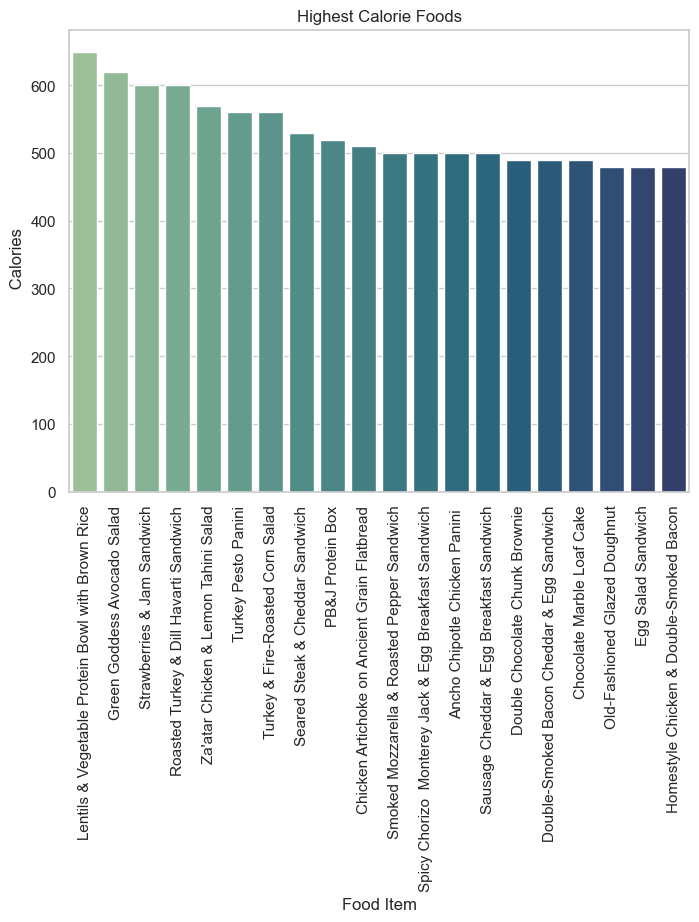

In [258]:
plt.figure(figsize=(8, 6))
sns.set_theme(style='whitegrid')
plot = sns.barplot(data=top20_cal, x='Food', y=' Calories', palette='crest')
plot.set(title='Highest Calorie Foods', xlabel='Food Item')
plt.xticks(rotation=90)
plt.show()

### Q.11: What food has the most amount of protein?

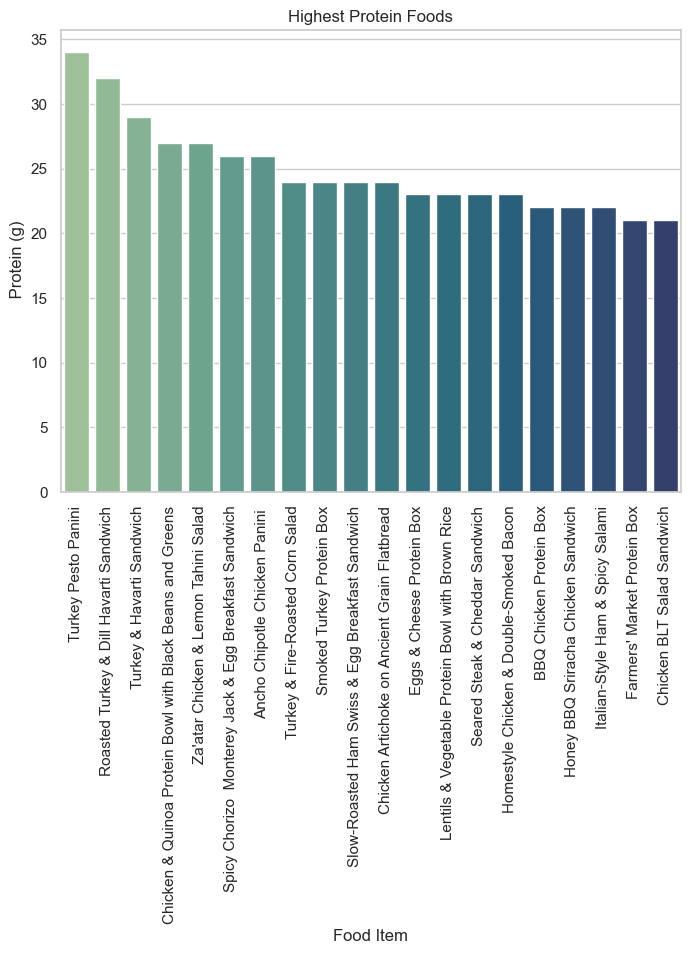

In [259]:
top20_prot = sb_food_menu.sort_values(by=[' Protein (g)'], ascending=False).head(20)

plt.figure(figsize=(8, 6))
sns.set_theme(style='whitegrid')
plot = sns.barplot(data=top20_prot, x='Food', y=' Protein (g)', palette='crest')
plot.set(title='Highest Protein Foods', xlabel='Food Item')
plt.xticks(rotation=90)
plt.show()

### Q.12: What food has the most amount of fat?

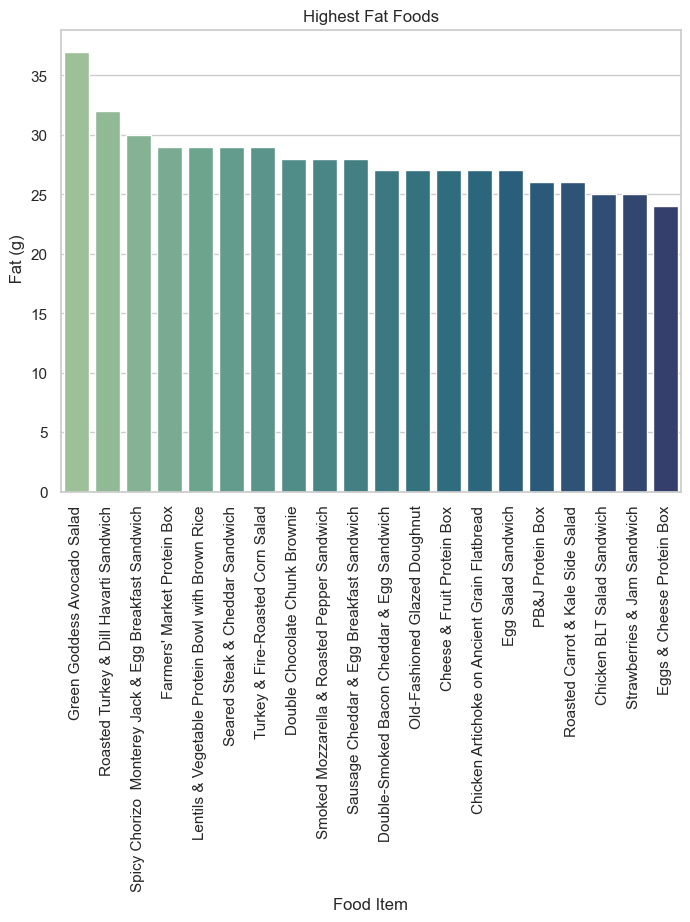

In [260]:
top20_fat = sb_food_menu.sort_values(by=[' Fat (g)'], ascending=False).head(20)

plt.figure(figsize=(8, 6))
sns.set_theme(style='whitegrid')
plot = sns.barplot(data=top20_fat, x='Food', y=' Fat (g)', palette='crest')
plot.set(title='Highest Fat Foods', xlabel='Food Item')
plt.xticks(rotation=90)
plt.show()

In [263]:
sb_drink_menu.isnull().any()

Calories     True
Fat (g)      True
Carb. (g)    True
Fiber (g)    True
Protein      True
Sodium       True
dtype: bool